### Carga de las librerías

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

### Carga de los datos y análisis preliminar

In [214]:
df_DB = pd.DataFrame(pd.read_csv(r"../data/australian_user_reviews.csv"))
df_DB.sample(5)

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,sentiment_analysis
20275,76561198052461539,http://steamcommunity.com/profiles/76561198052...,NaN,"Posted May 1, 2015.",NaN,9900.0,0 of 3 people (0%) found this review helpful,False,1
44550,datepicbruhdoh,http://steamcommunity.com/id/datepicbruhdoh,NaN,"Posted November 24, 2014.",NaN,230410.0,No ratings yet,True,2
20392,Urotsuki,http://steamcommunity.com/id/Urotsuki,NaN,"Posted December 30, 2013.",NaN,225600.0,1 of 1 people (100%) found this review helpful,True,2
33118,simonrem,http://steamcommunity.com/id/simonrem,NaN,"Posted March 21, 2014.",NaN,8870.0,No ratings yet,True,0
46725,fbibradfbi,http://steamcommunity.com/id/fbibradfbi,NaN,"Posted June 25, 2014.",NaN,107410.0,No ratings yet,True,1


In [215]:
df_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59333 entries, 0 to 59332
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             59333 non-null  object 
 1   user_url            59333 non-null  object 
 2   funny               8151 non-null   object 
 3   posted              59305 non-null  object 
 4   last_edited         6140 non-null   object 
 5   item_id             59305 non-null  float64
 6   helpful             59305 non-null  object 
 7   recommend           59305 non-null  object 
 8   sentiment_analysis  59333 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB


Podemos analizar que nuestros datos, exceptuando los índices y la URL, son de tres tipos:
- Datos que categorizan el juego: <b><i>recommend y sentiment_analysis</i></b>.
- Datos que categorizan los comentarios: <b><i><u>funny</u> y <u>helpful</u></i></b>.
- Datos con fecha: <b><i><u>posted</u>(*) y <u>last_edited</u></i></b>.

     (*) antes de eliminar la columna se debe extraer el año.
****
Los datos de los campos subrayados se pueden eliminar porque no aportan información relevante sobre los productos, ni de los usuarios.

### Análisis de valores faltantes

In [216]:
df_DB.isna().sum()

user_id                   0
user_url                  0
funny                 51182
posted                   28
last_edited           53193
item_id                  28
helpful                  28
recommend                28
sentiment_analysis        0
dtype: int64

In [217]:
df_DB[df_DB.item_id.isna()]

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,sentiment_analysis
137,gdxsd,http://steamcommunity.com/id/gdxsd,NaN,NaN,NaN,NaN,NaN,NaN,1
177,76561198094224872,http://steamcommunity.com/profiles/76561198094...,NaN,NaN,NaN,NaN,NaN,NaN,1
2559,76561198021575394,http://steamcommunity.com/profiles/76561198021...,NaN,NaN,NaN,NaN,NaN,NaN,1
10080,cmuir37,http://steamcommunity.com/id/cmuir37,NaN,NaN,NaN,NaN,NaN,NaN,1
13767,Jaysteeny,http://steamcommunity.com/id/Jaysteeny,NaN,NaN,NaN,NaN,NaN,NaN,1
15493,ML8989,http://steamcommunity.com/id/ML8989,NaN,NaN,NaN,NaN,NaN,NaN,1
19184,76561198079215291,http://steamcommunity.com/profiles/76561198079...,NaN,NaN,NaN,NaN,NaN,NaN,1
20223,76561198079342142,http://steamcommunity.com/profiles/76561198079...,NaN,NaN,NaN,NaN,NaN,NaN,1
25056,76561198061996985,http://steamcommunity.com/profiles/76561198061...,NaN,NaN,NaN,NaN,NaN,NaN,1
26257,76561198108286351,http://steamcommunity.com/profiles/76561198108...,NaN,NaN,NaN,NaN,NaN,NaN,1


Text(0.5, 1.0, 'Valores Nulos')

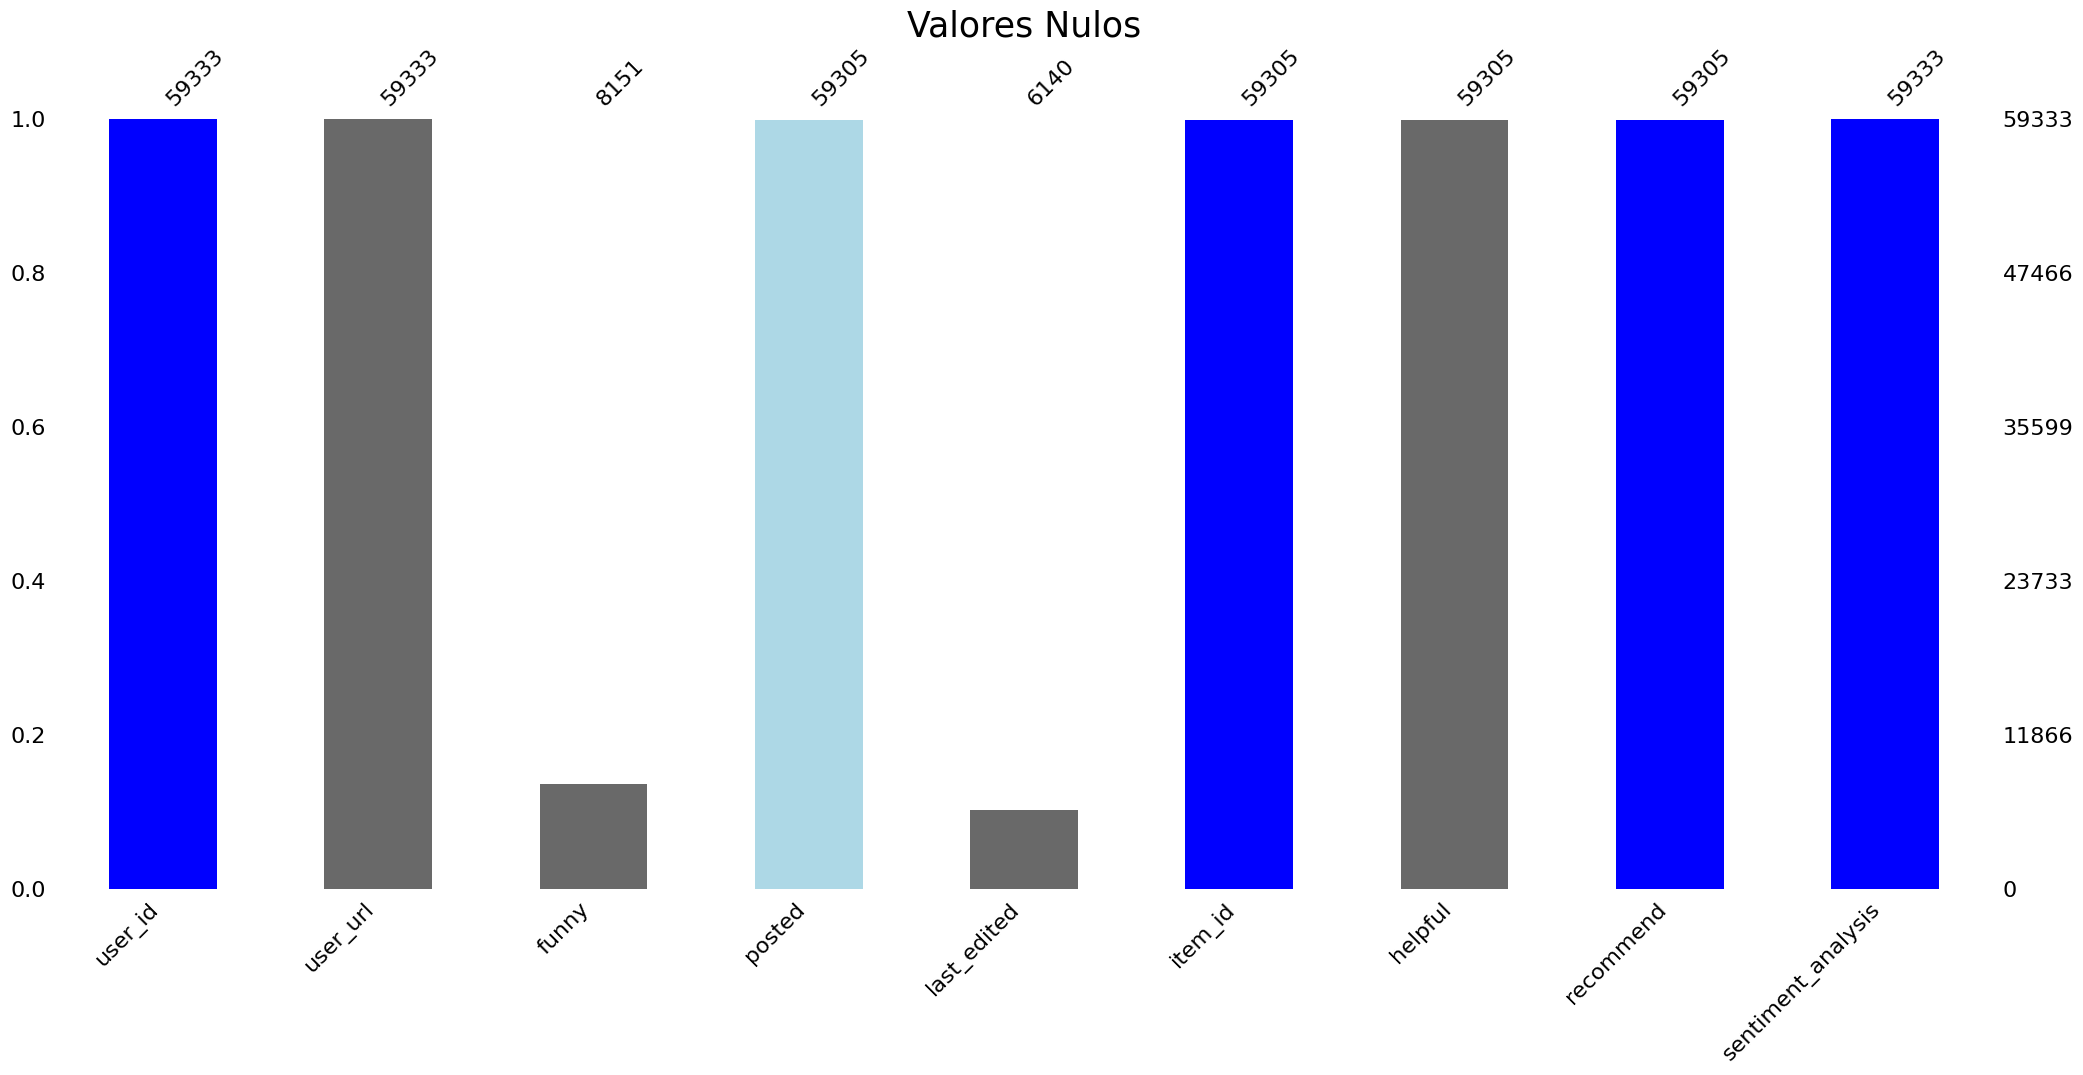

In [218]:
# Uso missigno para analizar datos perdidos
import missingno
#graficamos los registros válidos
color =["blue","dimgrey", "dimgrey", "lightblue", "dimgrey", "blue", "dimgrey", "blue", "blue"]
missingno.bar(df_DB, color=color)
plt.title("Valores Nulos", fontsize=25)

Salvo la columna *posted*, que se analizará por separado, de los campos a eliminar no nos interesan los valores perdidos.

Los valores NaN de la columna *item_id* son 28, un número pequeño en relación al conjunto de registros, por eso y considerando que la información de este set se utilizará para filtros y para el sistema de recomendación user-item, <b><i>decido eliminar los registros con valores NaN en item_id</i></b>.

La columna *posted*, si bien la eliminaremos tiene importancia porque será utililizada para calcular el año del comentario.Los valores perdidos son los mismos que los de las columnas item_id, recommend y helpful. 


Sin embargo, hay registros con valores de fechas incosistentes, por que el tratamiento de estos datos será:
1) Manipular los datos del campo para extraer el año del comentario en una nueva columna que se llamará anio_post.
2) Eliminar la columna.
3) Para la columna anio_post los valores faltantes y con años incosistentes, se completarán tomando el valor del año del último registro con un dato válido al procesarlos en orden secuencial.

### Poceso de transformación derivado de los análisis preliminar y de valores faltantes

In [219]:
# Elimino las columas (salvo posted que es necesaria para tomar el año)
# si bien no había se habían decidido acciones sobre "user_url" en 
# los análisis, no posee información de utilidad
columnasEliminar = ["user_url", "funny", "last_edited", "helpful"]
df_DB.drop(columnasEliminar, axis=1, inplace=True)

In [220]:
# Elimino las filas que tienen valores nulos en la columna iten_id
filtro = df_DB[df_DB.item_id.isna()].index
df_DB.drop(filtro, inplace=True)
df_DB = df_DB.reset_index()

In [221]:
# Transformaciones en el campo posted para poder obtener el año
df_DB["posted"] = df_DB["posted"].str.replace("Posted ","").replace("posted ","").str.replace(".","").str.strip()

In [222]:
# Creo la columna anio_post y lo lleno con valores del año tomados de la columna posted
# a las fechas que estén en formato incorrecto se les coloca "0"
df_DB["anio_post"] = df_DB["posted"].apply(lambda x: int(x[len(x)-4:len(x)]) if x[len(x)-4:len(x)].isnumeric() else 0)

In [223]:
# Reemplazo los valores de la columna anio_post que están en "0" por el año del 
# último registro anterior con año válido
anio = df_DB[df_DB["anio_post"] > 0]["anio_post"].min()
for i in range(1,len(df_DB["anio_post"])):
    if int(df_DB["anio_post"][i]) == 0:
        df_DB["anio_post"][i] = anio
    else:
        anio = int(df_DB["anio_post"][i])

In [224]:
df_DB["anio_post"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59305 entries, 0 to 59304
Series name: anio_post
Non-Null Count  Dtype
--------------  -----
59305 non-null  int64
dtypes: int64(1)
memory usage: 463.4 KB


In [225]:
# Elimino las columas posted e index (se creo durante el proceso)
df_DB.drop(["posted", "index"], axis=1, inplace=True)

In [226]:
df_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             59305 non-null  object 
 1   item_id             59305 non-null  float64
 2   recommend           59305 non-null  object 
 3   sentiment_analysis  59305 non-null  int64  
 4   anio_post           59305 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [227]:
df_DB.isna().sum()

user_id               0
item_id               0
recommend             0
sentiment_analysis    0
anio_post             0
dtype: int64

In [228]:
# Cambio el tipo de datos de las columnas item_id y anio_post a entero
df_DB["item_id"] = df_DB["item_id"].astype("int")
df_DB["anio_post"] = df_DB["anio_post"].astype("int")

Text(0.5, 1.0, 'Valores Nulos')

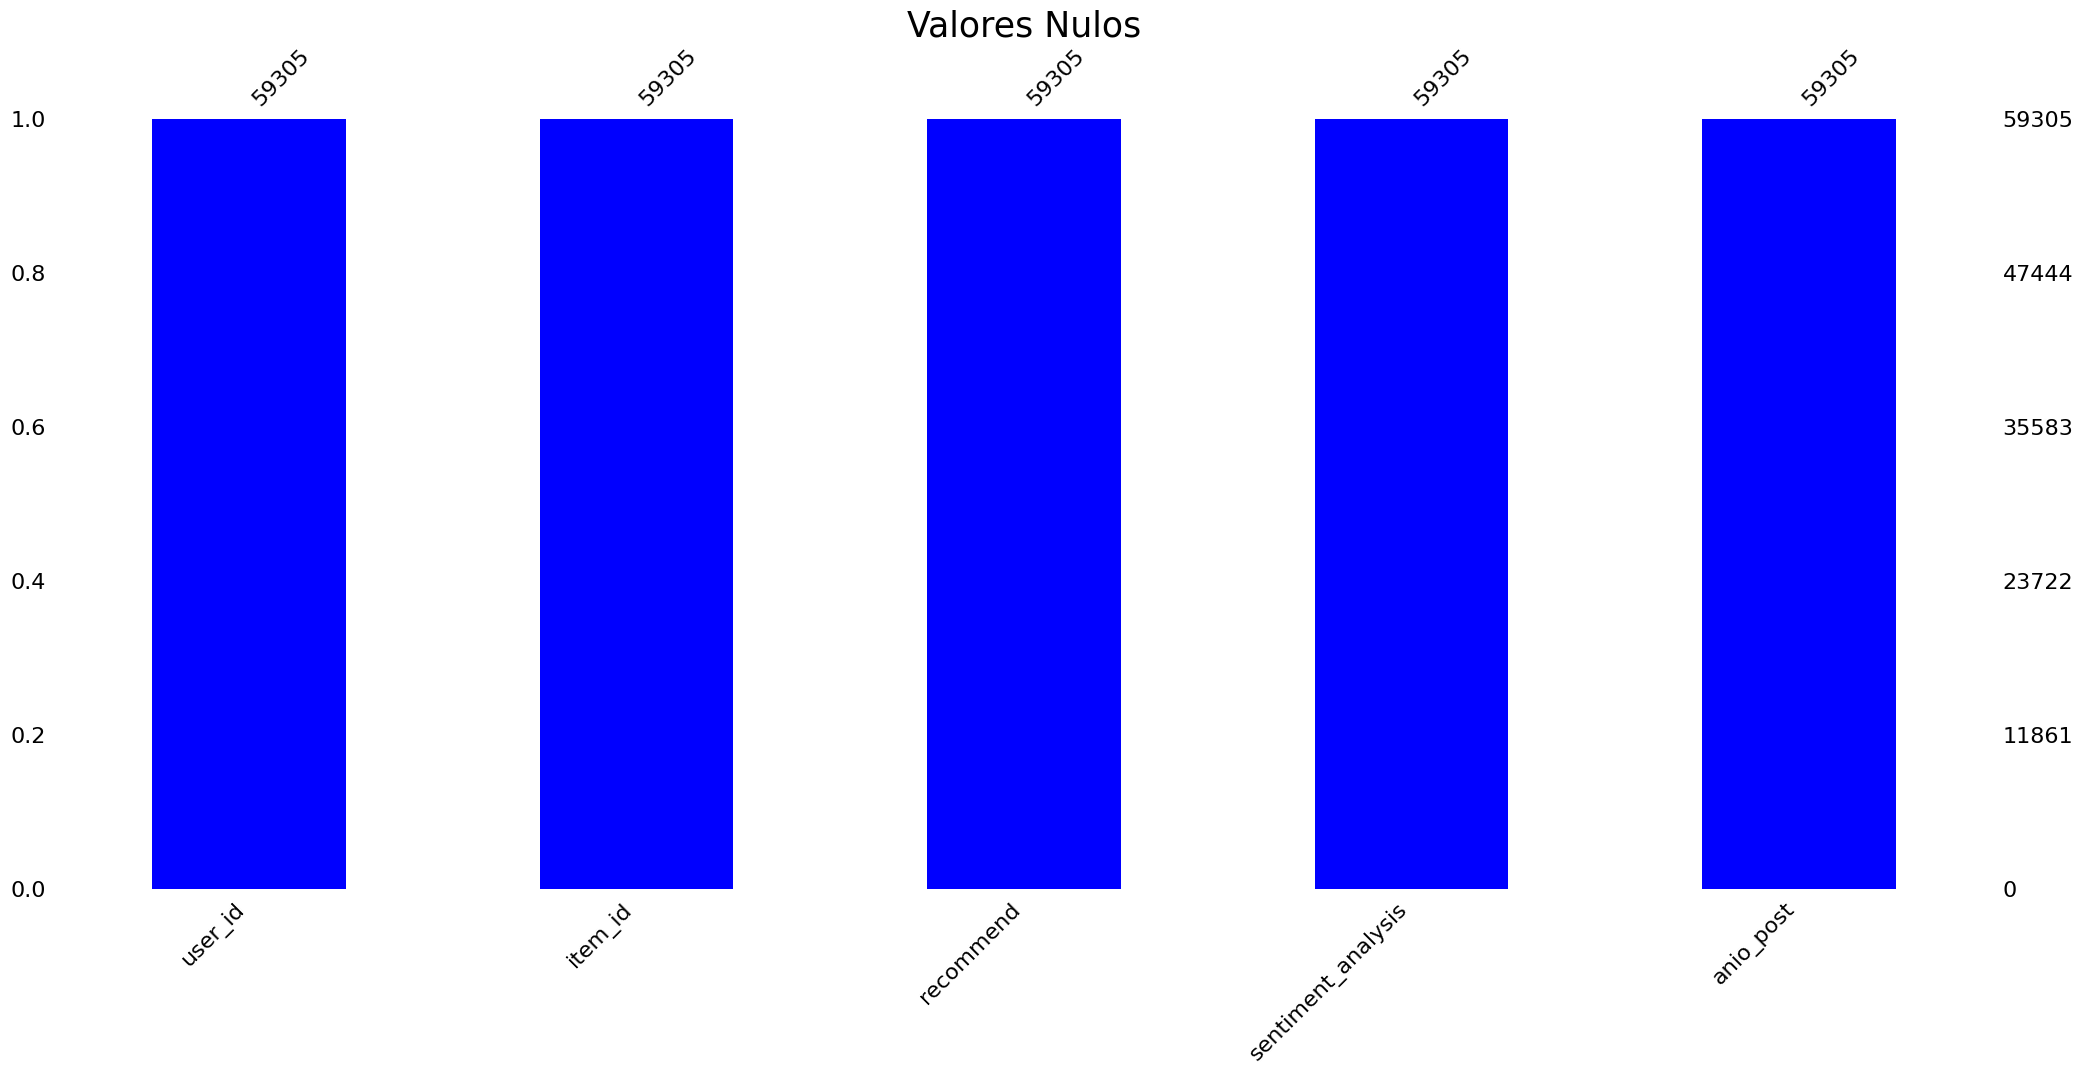

In [229]:
#graficamos los registros válidos
missingno.bar(df_DB, color="blue")
plt.title("Valores Nulos", fontsize=25)

### Análisis de distribución de los datos

In [230]:
# Distribución de la registros por recomend (True,False)
recomendado = df_DB["recommend"].value_counts()
porcentaje = 100*df_DB["recommend"].value_counts(normalize=True)
pd.DataFrame({"Recomendados":recomendado, "Porcentaje":porcentaje.round(2)})

,Recomendados,Porcentaje
recommend,,
True,52473,88.48
False,6832,11.52


In [231]:
import plotly.express as px
fig = px.histogram(df_DB, x="recommend",title="Distribución de Recommend")
fig.update_layout(bargap=0.1)
fig.show()

In [232]:
# Distribución de la registros por sentiment_analysis [0,1,2]
recomendado = df_DB["sentiment_analysis"].value_counts()
porcentaje = 100*df_DB["sentiment_analysis"].value_counts(normalize=True)
pd.DataFrame({"Analisis de Sentimientos":recomendado, "Porcentaje":porcentaje.round(2)})

,Analisis de Sentimientos,Porcentaje
sentiment_analysis,,
2,33908,57.18
1,18358,30.96
0,7039,11.87


In [233]:
import plotly.express as px
fig = px.histogram(df_DB, x="sentiment_analysis",title="Distribución de Análisis de Sentimientos")
fig.update_layout(bargap=0.1)
fig.show()

In [234]:
# Distribución de la registros por anio_post
recomendado = df_DB["anio_post"].value_counts()
porcentaje = 100*df_DB["anio_post"].value_counts(normalize=True)
pd.DataFrame({"Posteos por año":recomendado, "Porcentaje":porcentaje.round(2)})

,Posteos por año,Porcentaje
anio_post,,
2014,26316,44.37
2015,22644,38.18
2013,8145,13.73
2012,1486,2.51
2011,624,1.05
2010,90,0.15


In [235]:
import plotly.express as px
fig = px.histogram(df_DB, x="anio_post",title="Distribución de Comentarios por Años")
fig.update_layout(bargap=0.1)
fig.show()

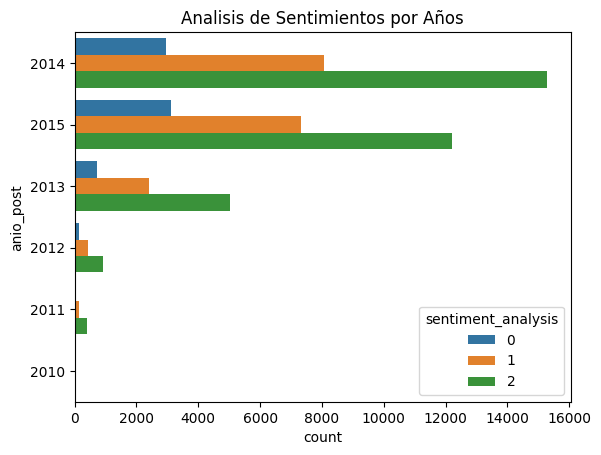

In [236]:
# Analisis de Sentimientos por Años
sns.countplot(y= "anio_post", data=df_DB, order=df_DB["anio_post"].value_counts().index[0:], hue=df_DB["sentiment_analysis"])
plt.title("Analisis de Sentimientos por Años")
plt.show()

### Grabación del dataframe con el archivo para la API en formato csv

In [237]:
df_DB.to_csv("../data/aur_api.csv", index=False)